# Breast Cancer Classification
This project focuses on classifying breast cancer using machine learning techniques. The goal is to accurately distinguish between benign and malignant tumors based on various features extracted from medical images.

## Data Source
The dataset is from the UCI Machine Learning Repository, specifically the Breast Cancer Wisconsin (Diagnostic) Dataset. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

In [56]:
import pandas as pd
# Read the breast cancer dataset
file_path = 'data/breast-cancer.csv'
df = pd.read_csv(file_path)

## Exploratory Data Analysis

### Inspecting the Data

We start by loading the dataset and inspecting the first few rows to understand its structure and the features available for analysis.

In [57]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [60]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Understand the Target Variable
The target variable in this dataset is the "diagnosis" column, which indicates whether the tumor is benign (B) or malignant (M). We will analyze the distribution of this variable to see how many instances of each class are present

In [61]:
df['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

In [62]:
df['diagnosis'].value_counts(normalize=True) * 100

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

#### Distribution of the target variable (benign vs malignant)?
To visualize the distribution of the target variable, we can use a count plot to show the number of benign and malignant cases in the dataset.

In [63]:
df['diagnosis'] = df['diagnosis'].astype(str).str.strip().str.upper()
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

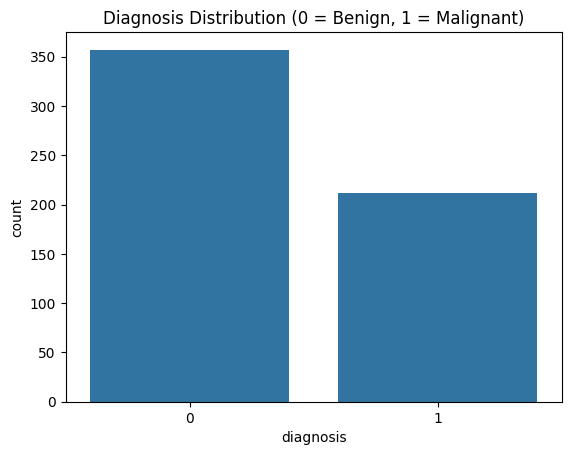

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['diagnosis'])
plt.title("Diagnosis Distribution (0 = Benign, 1 = Malignant)")
plt.show()

Observations: Benign cases significantly outnumber malignant cases, indicating a class imbalance but it is not extreme.

### Univariate Analysis
We will perform univariate analysis on the features to understand their distributions, central tendencies, and variability

**Goal**

Understand:
- How each feature behaves alone
- Which features have weird values
- Whether scaling / transformation is needed
- Which features might be predictive
- Find signs of outliers, skewness, range problems

##### Separate features from target variable

In [71]:
features = df.drop(columns=['diagnosis', 'id']).columns  # keep only numeric features
df_features = df[features]
df_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### Basic Statistics of Features - Scale and Range

In [72]:
df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In this dataset, features like area_mean have values in hundreds, while smoothness_mean is around 0.1 → feature scaling is necessary.

#### Check distributions of features - Histograms and KDE Plots

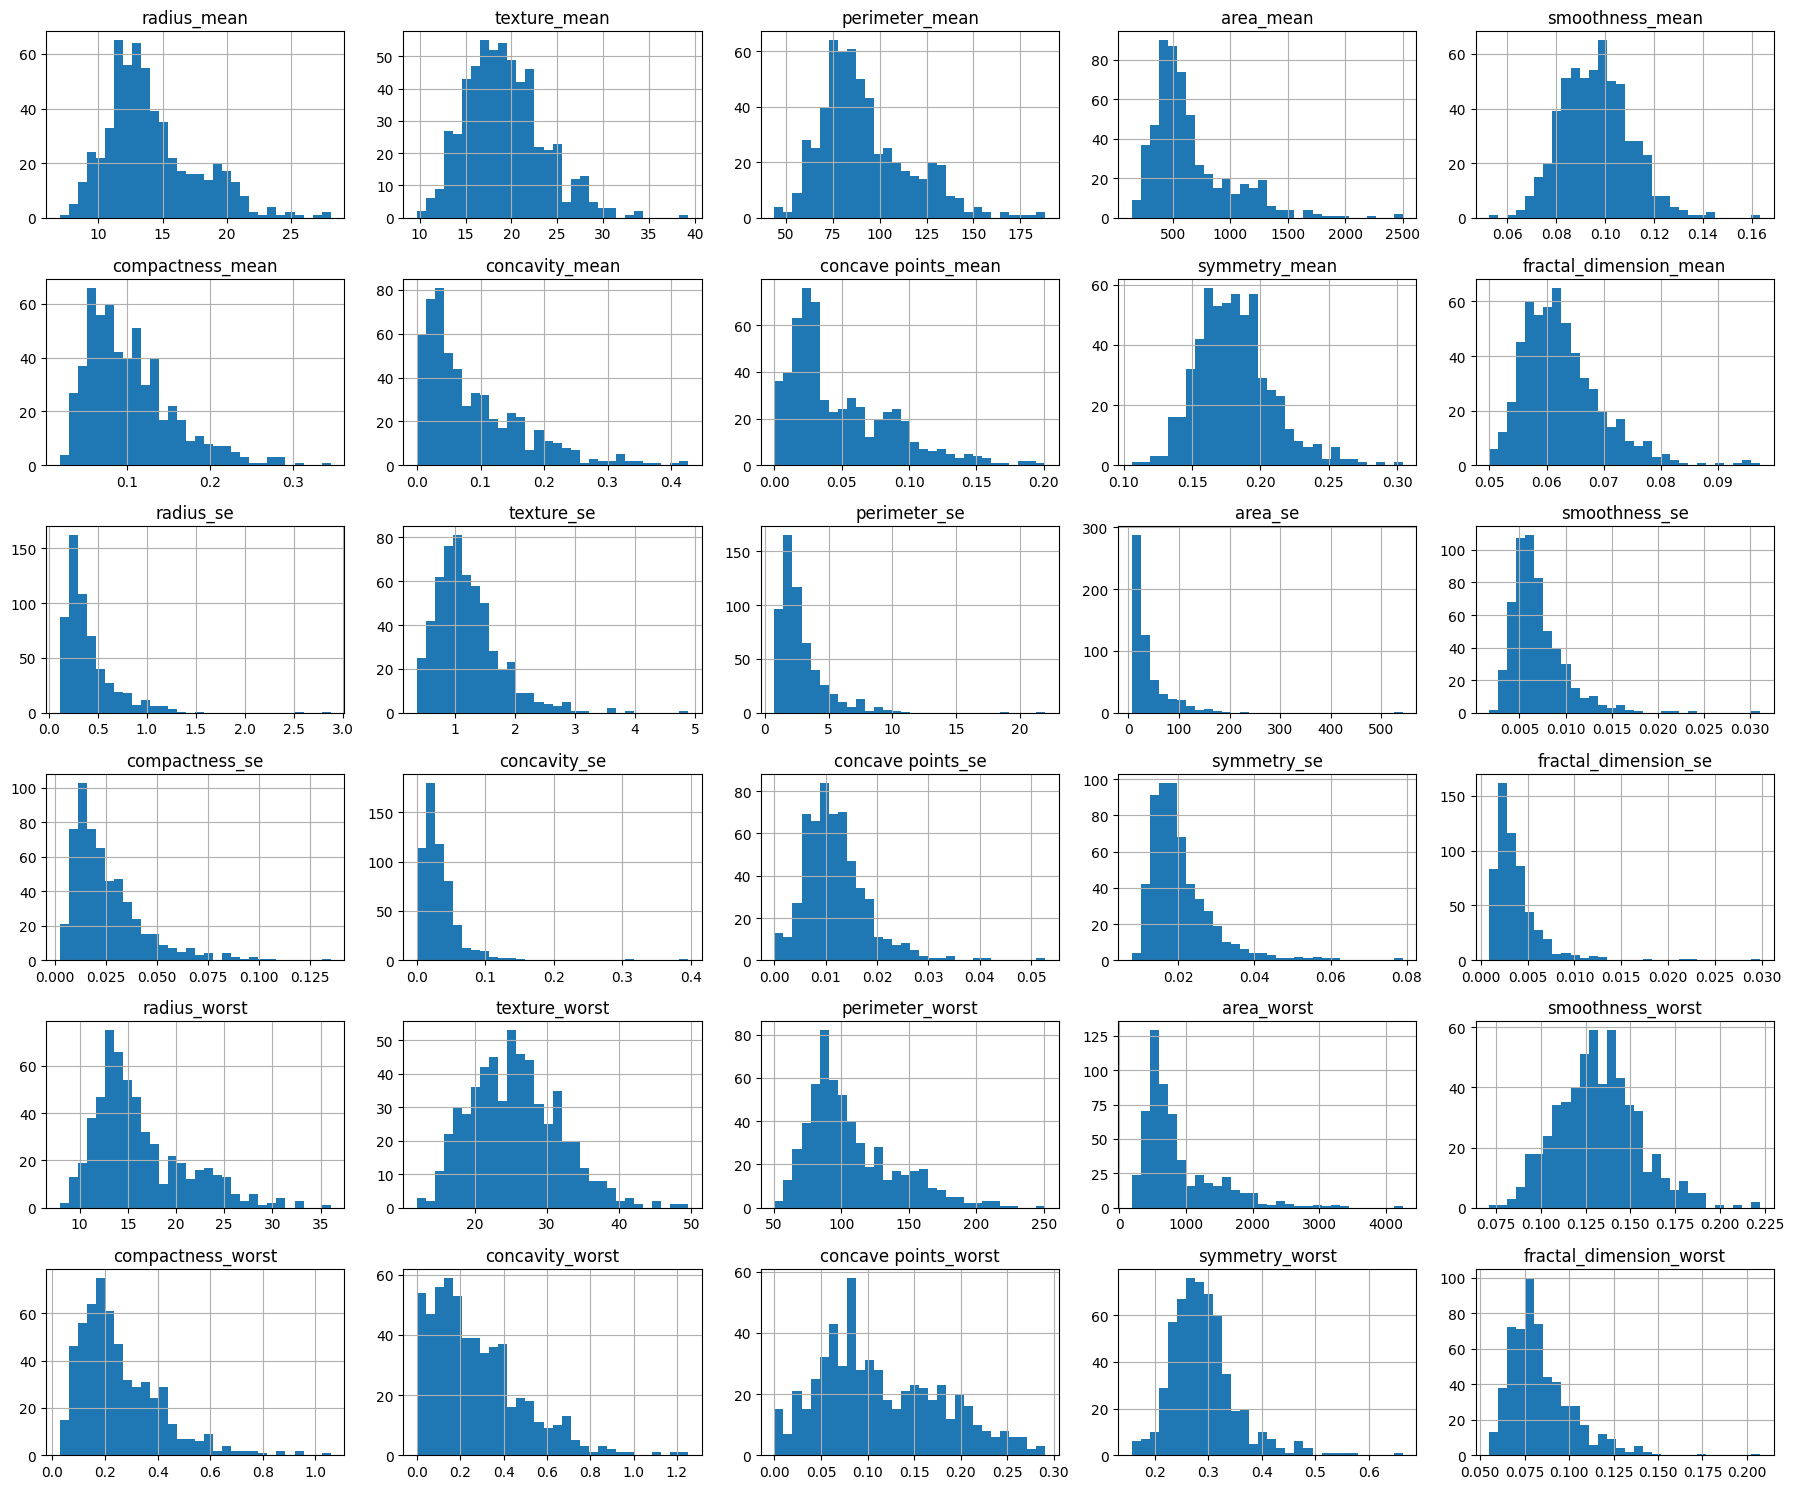

In [73]:
df_features.hist(figsize=(18, 15), bins=30)
plt.tight_layout()
plt.show()

In [74]:
skew_vals = df_features.skew().sort_values(ascending=False)
skew_vals

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
texture_worst              0.498321
concave points_worst       0

Many features like area, radius, concavity are highly right-skewed.

#### Boxplots – Find Outliers

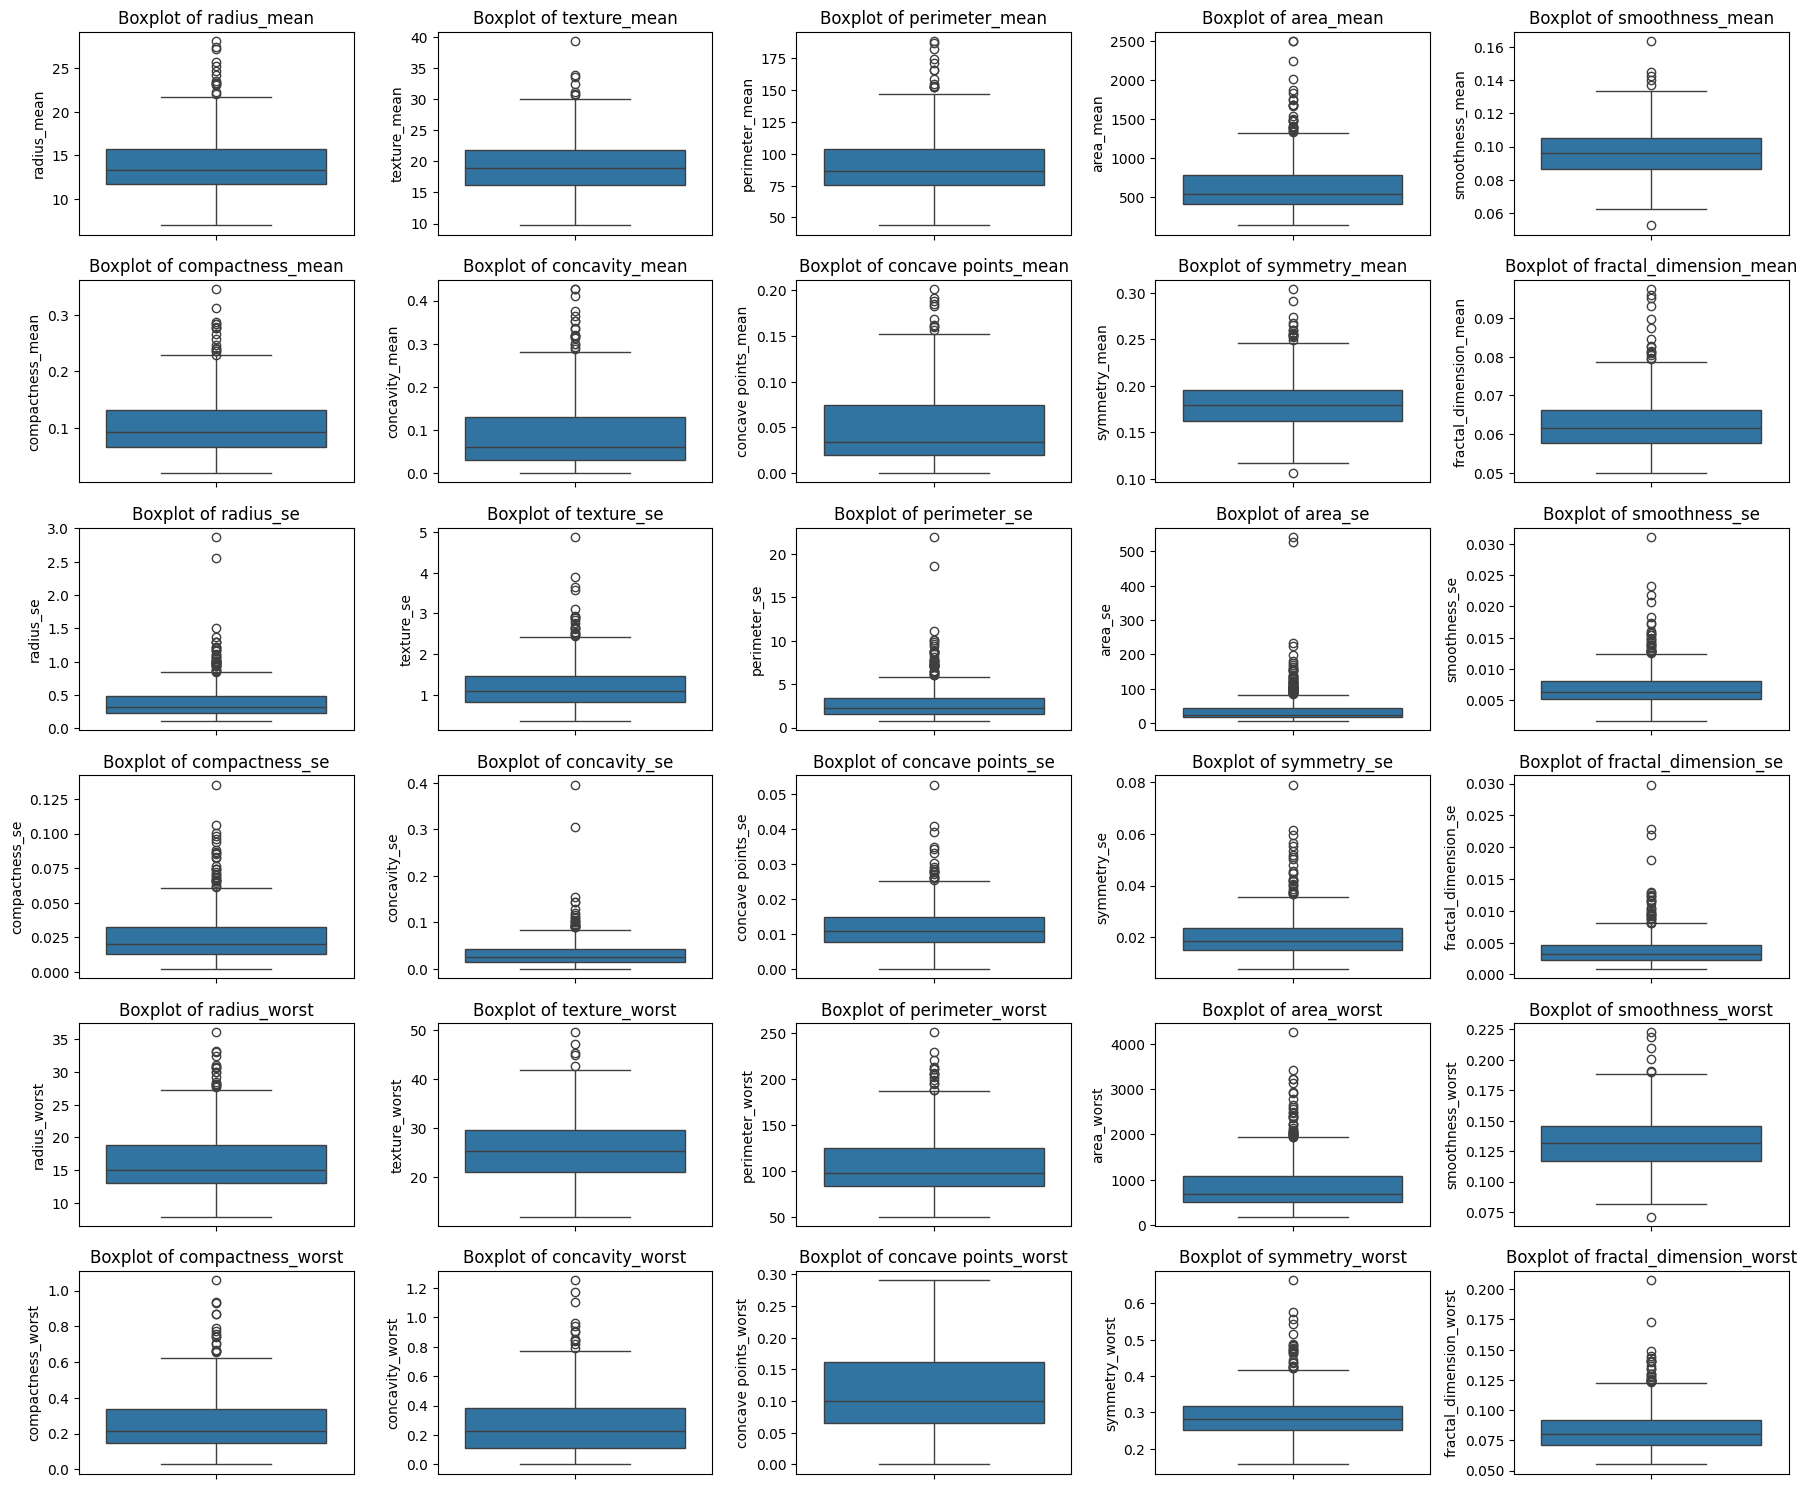

In [81]:
#write code to plot boxplots for all features to identify outliers
plt.figure(figsize=(18, 15))
for i, feature in enumerate(features):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(y=df_features[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### Feature vs Target (Malignant vs Benign Comparison)
Goal

Understand how features differ between diagnosis = 0 (Benign) and 1 (Malignant) —
we want to see patterns like:

Are malignant tumors larger?

Are they more irregular?

Can we visually separate classes using 1-2 features?

This step builds REAL understanding of the data — not just ML blindly.

In [82]:
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


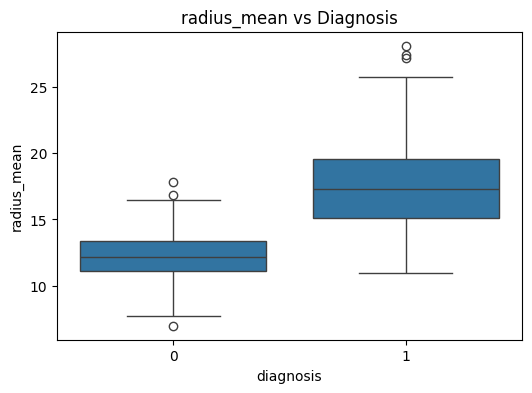

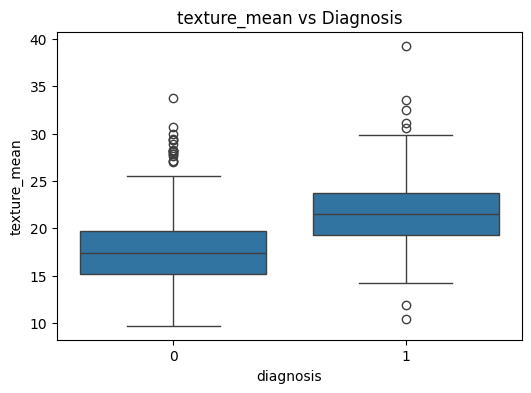

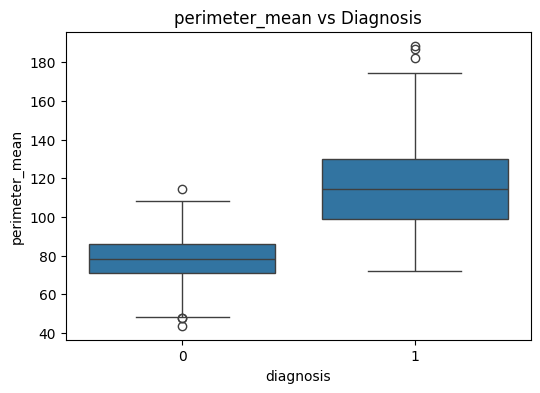

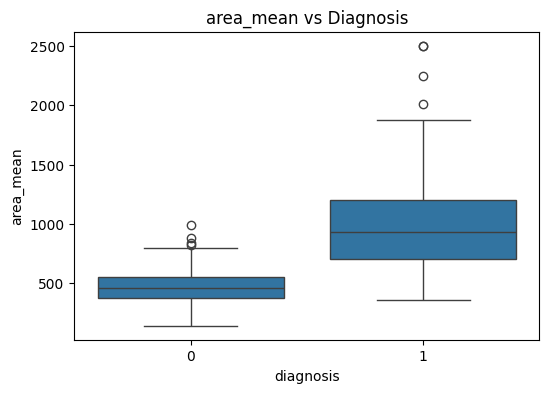

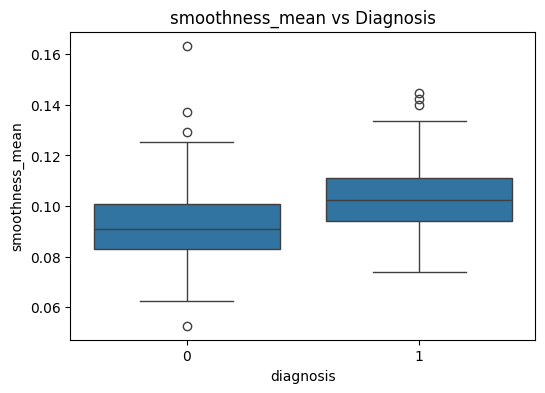

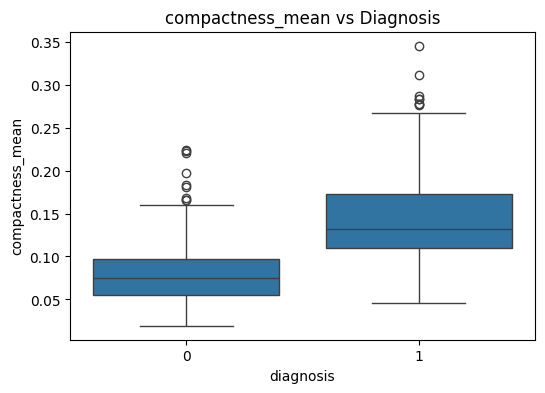

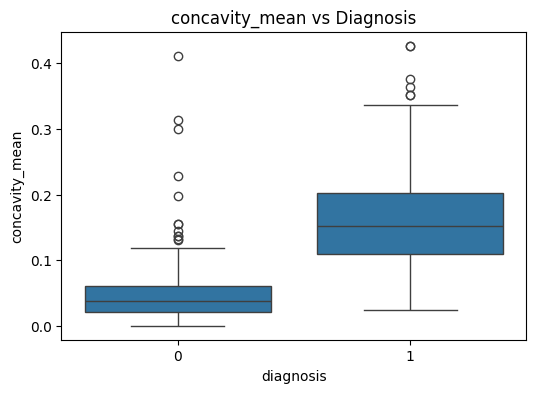

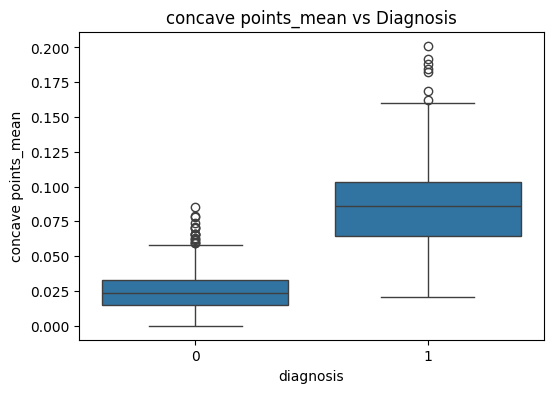

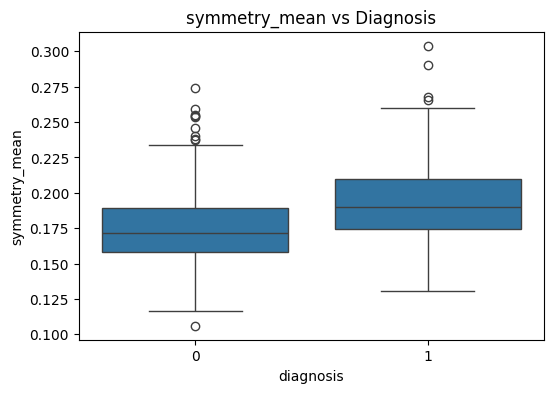

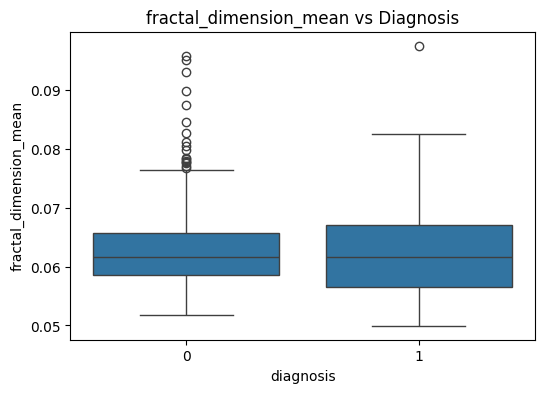

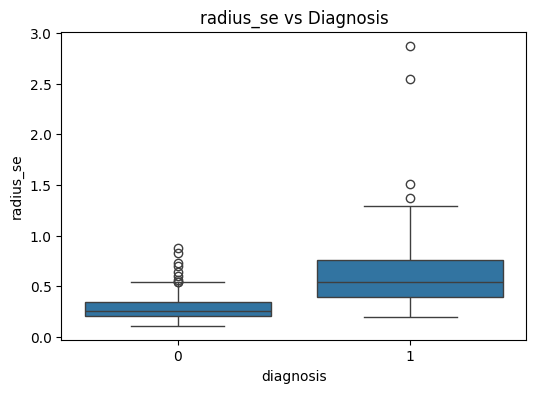

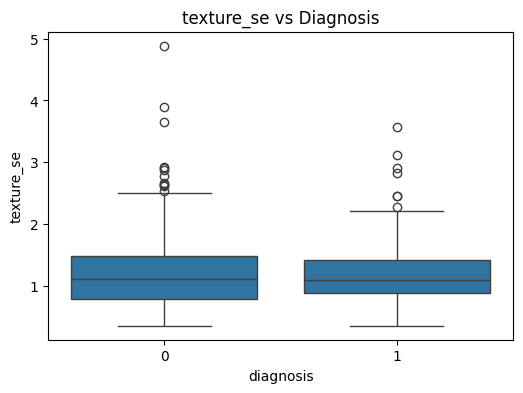

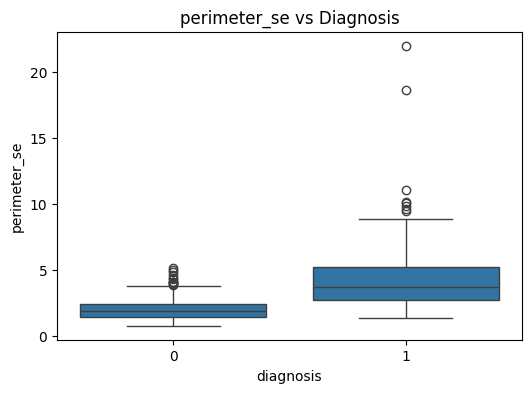

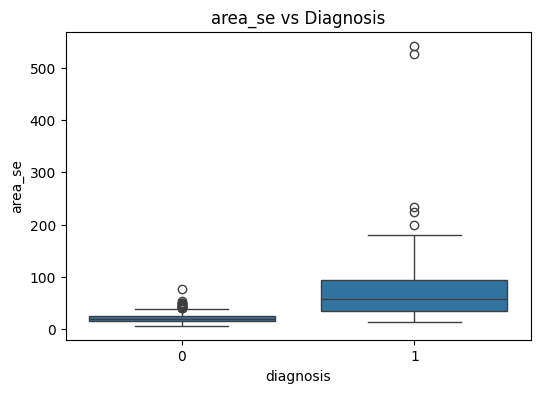

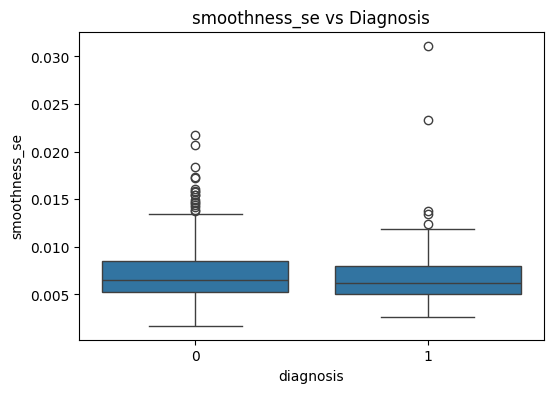

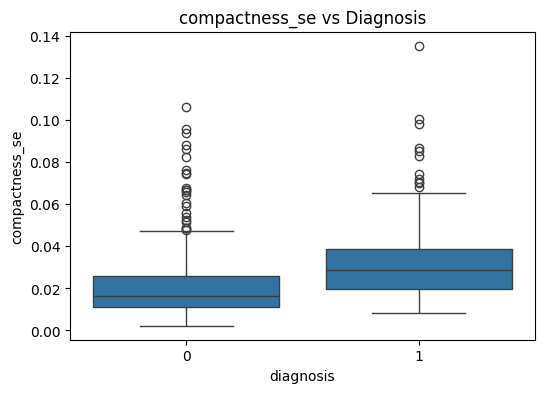

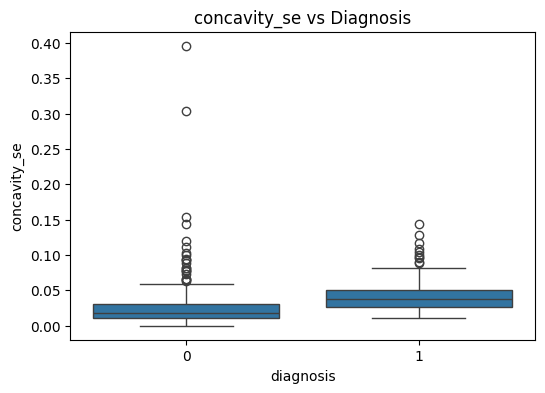

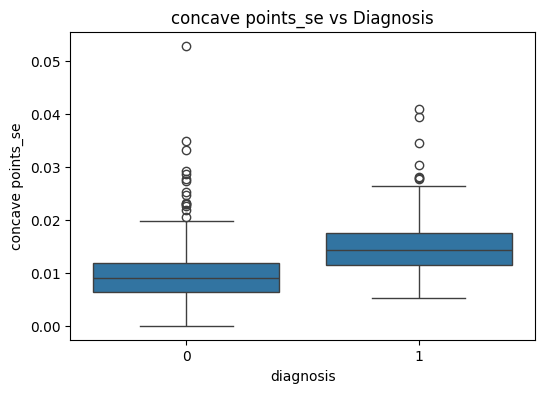

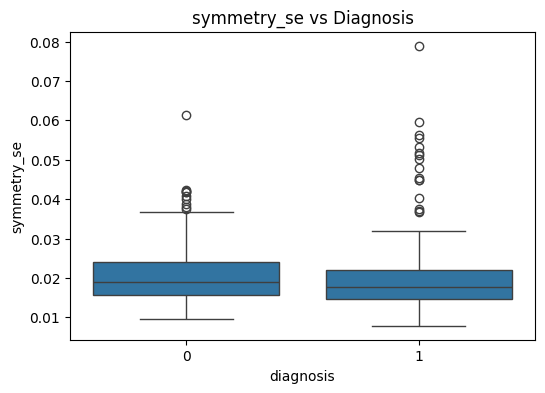

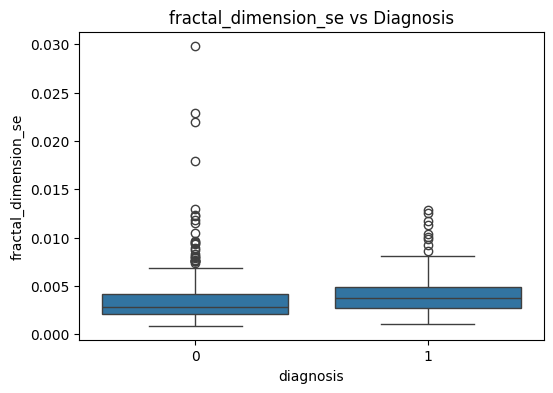

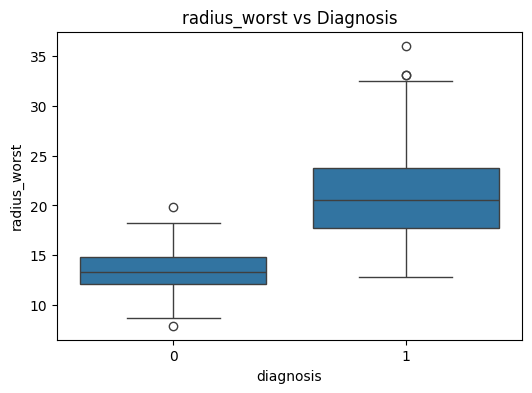

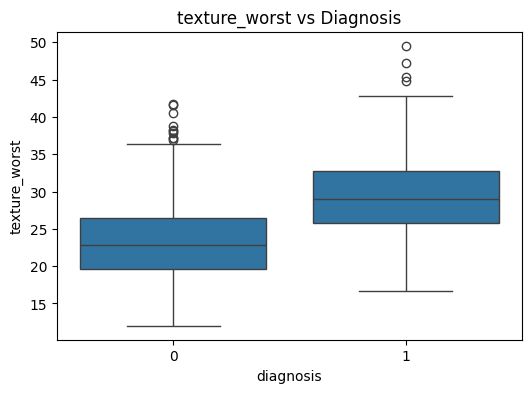

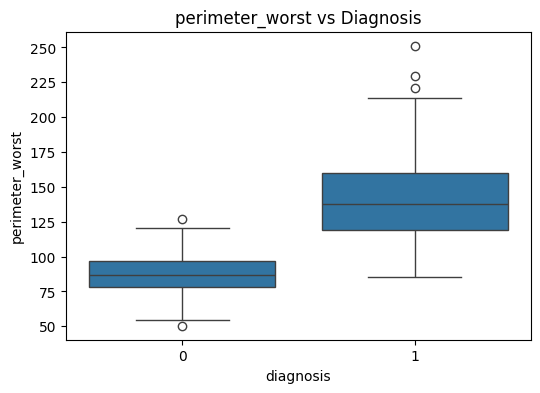

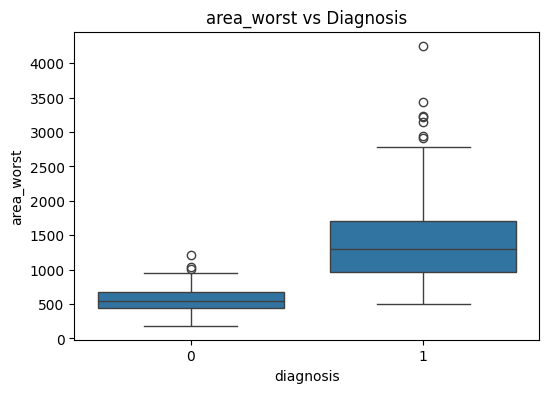

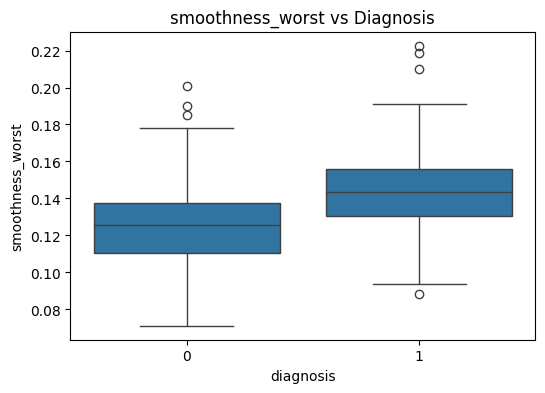

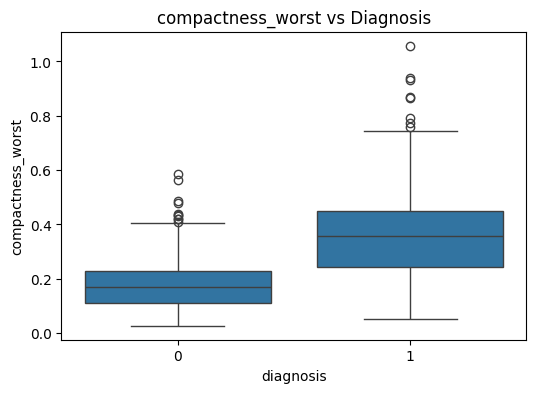

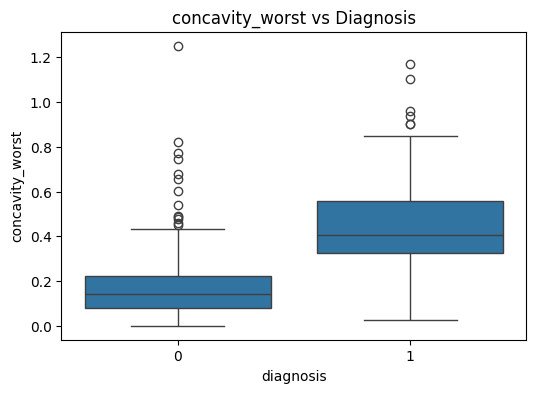

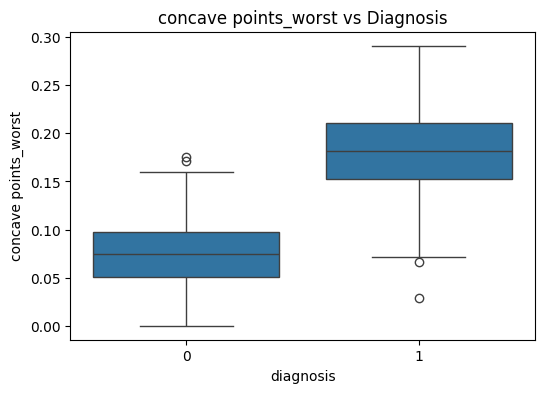

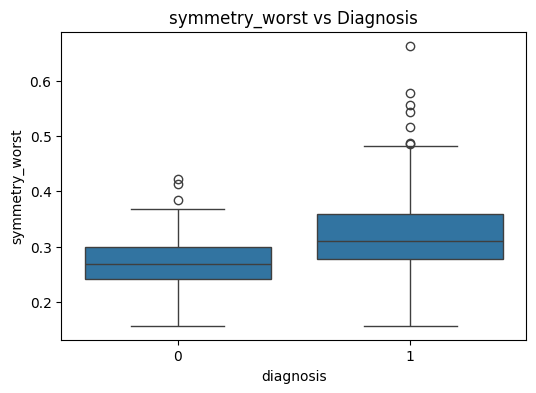

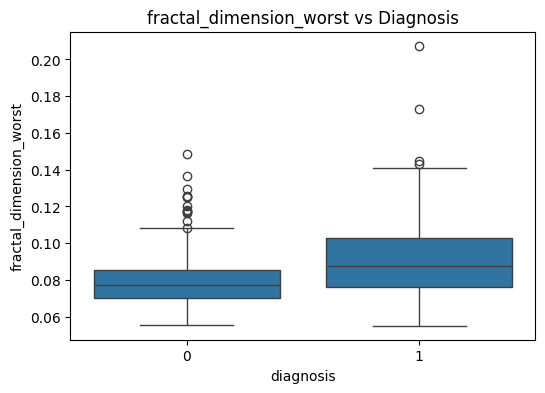

In [ ]:
for col in df_features.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['diagnosis'], y=df[col])
    plt.title(f"{col} vs Diagnosis")
    plt.show()

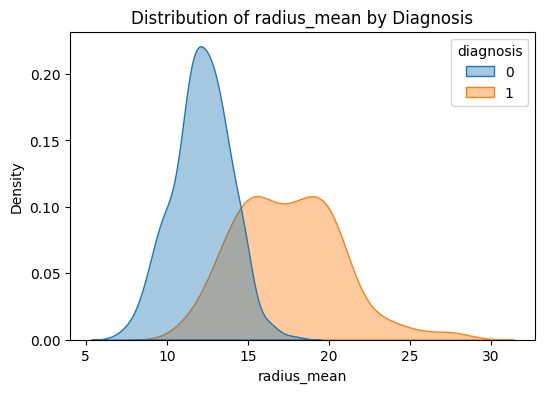

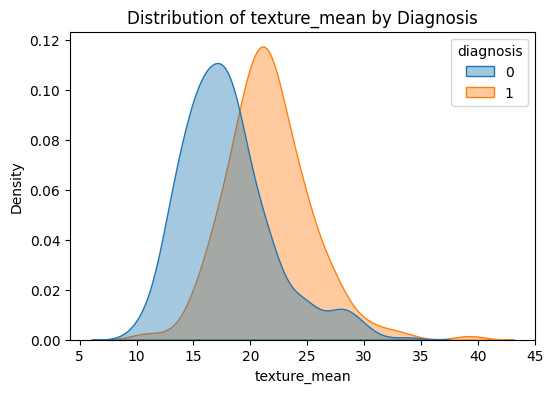

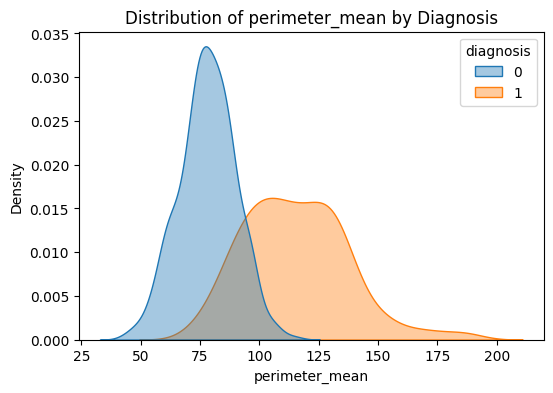

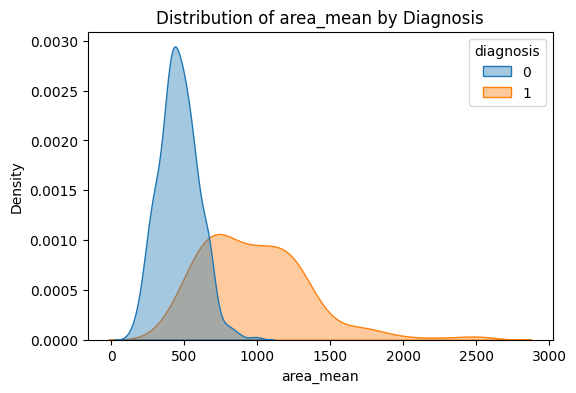

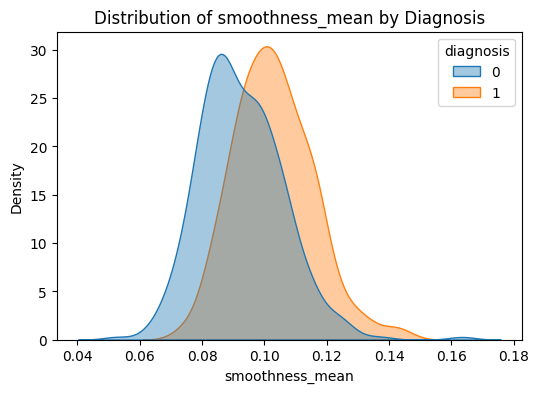

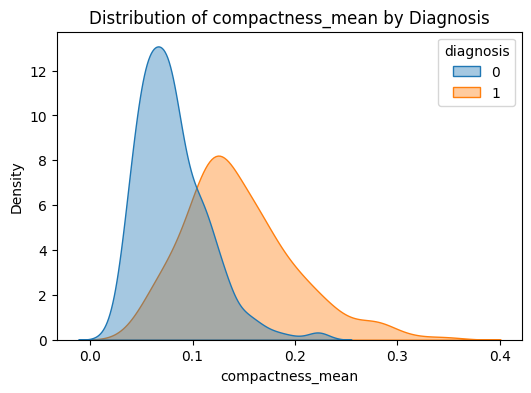

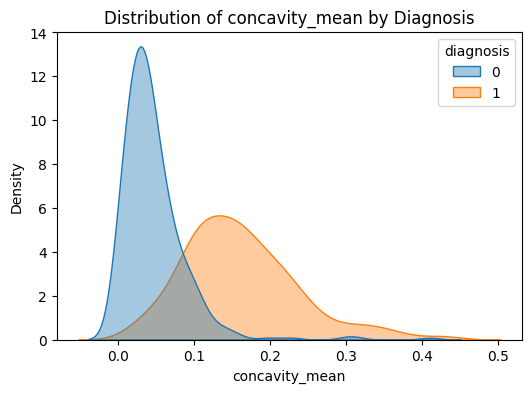

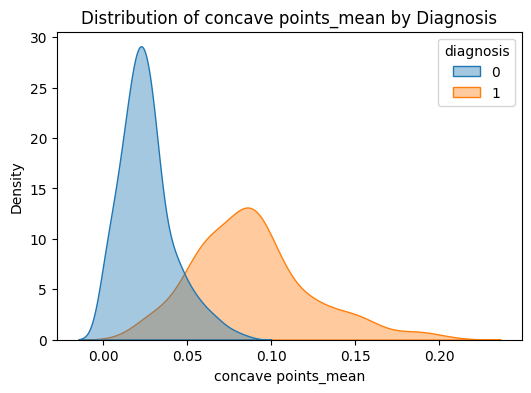

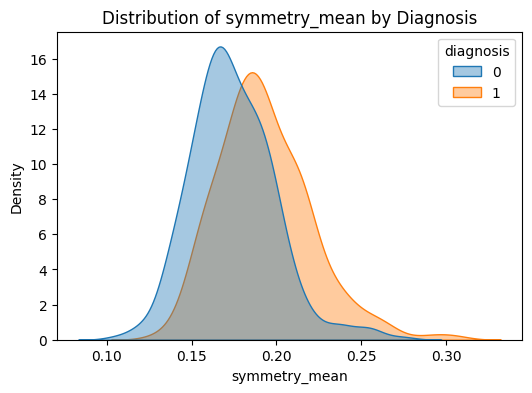

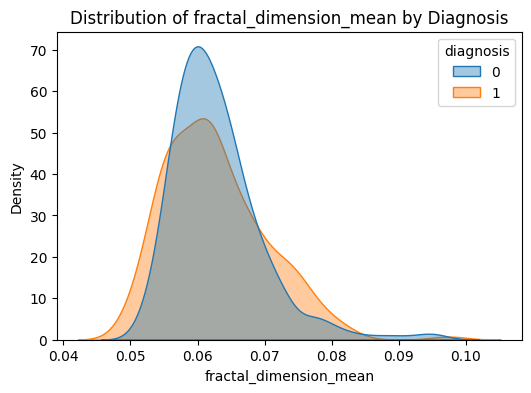

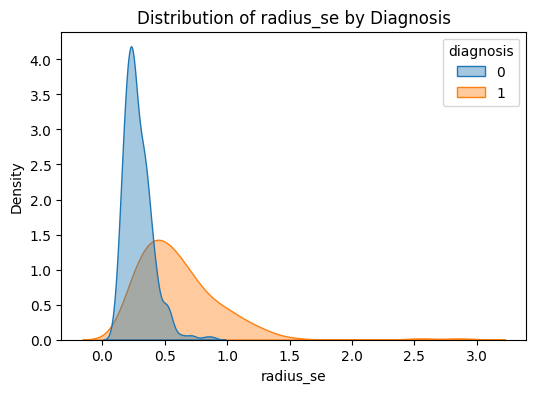

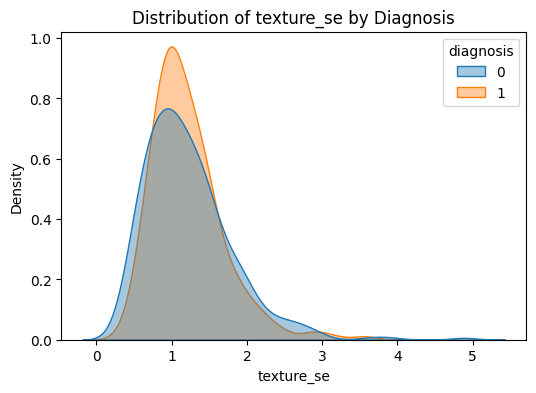

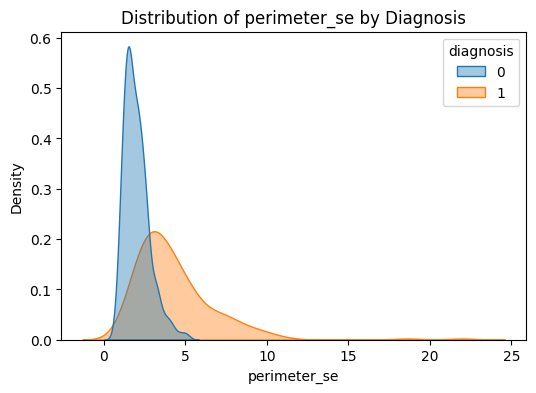

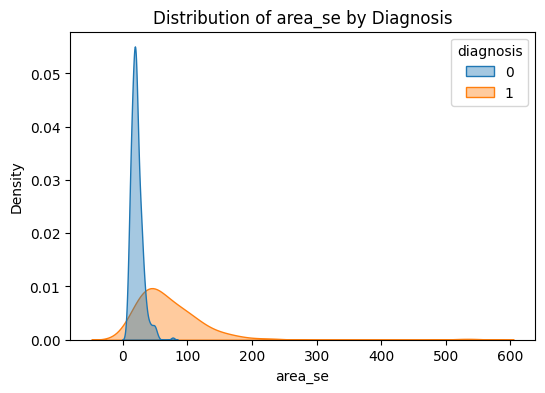

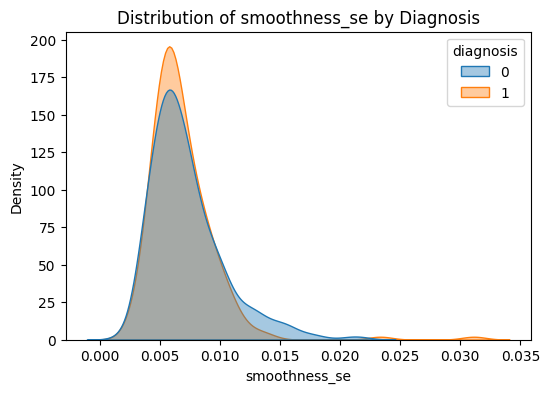

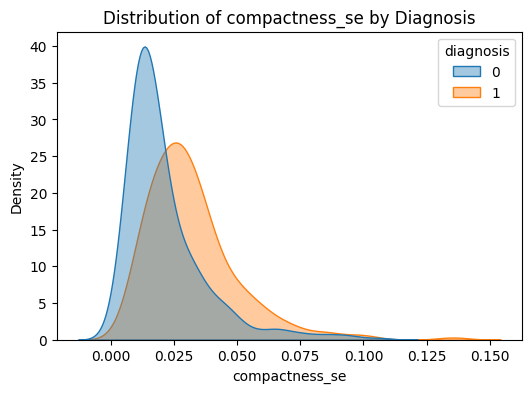

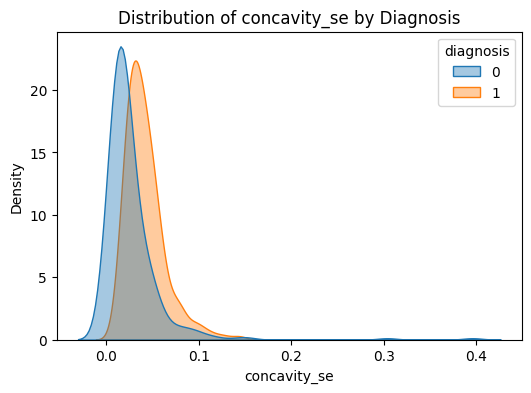

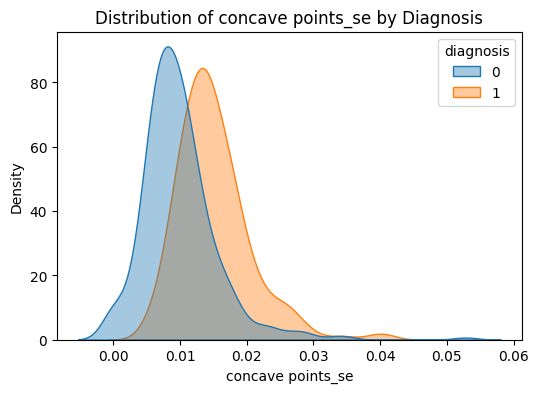

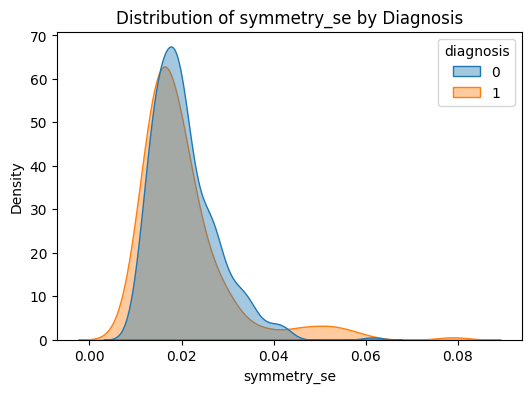

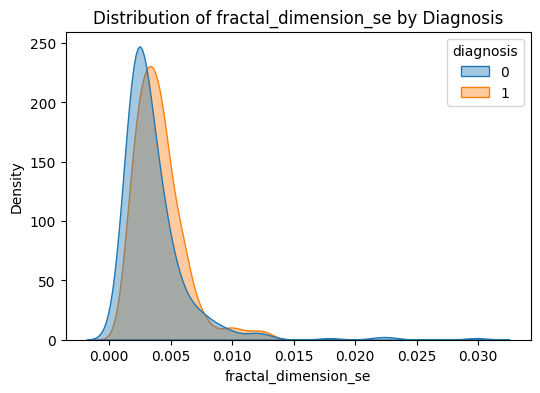

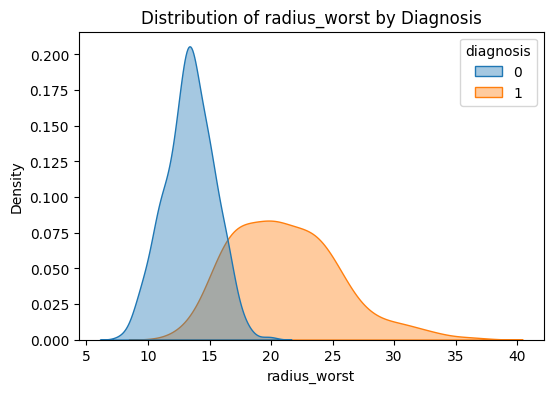

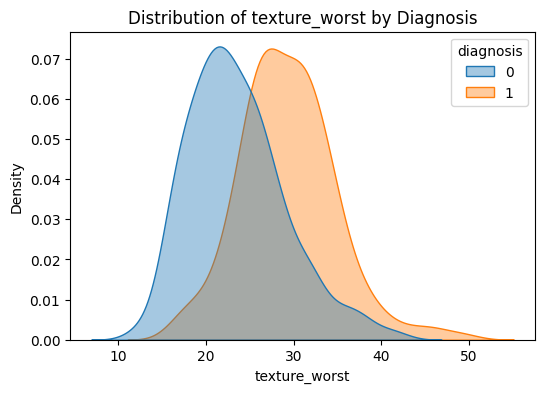

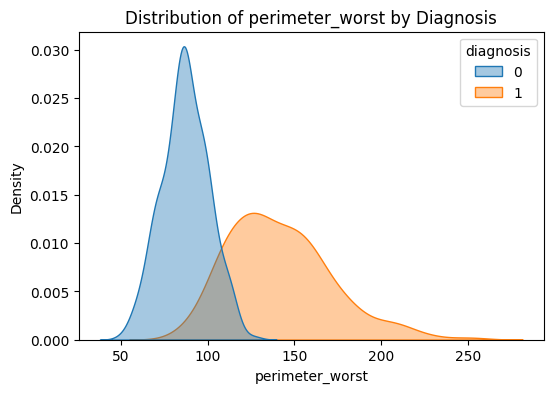

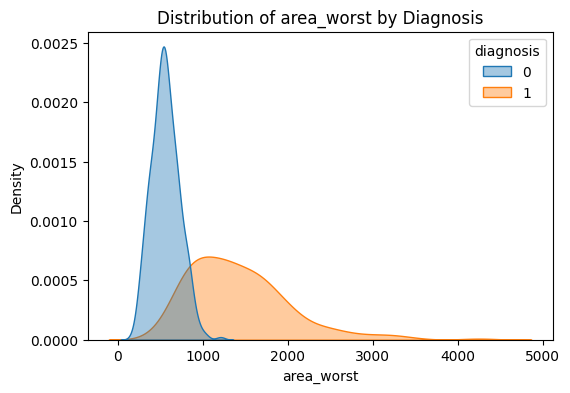

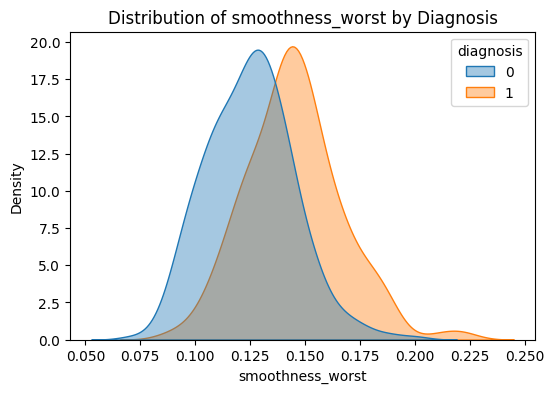

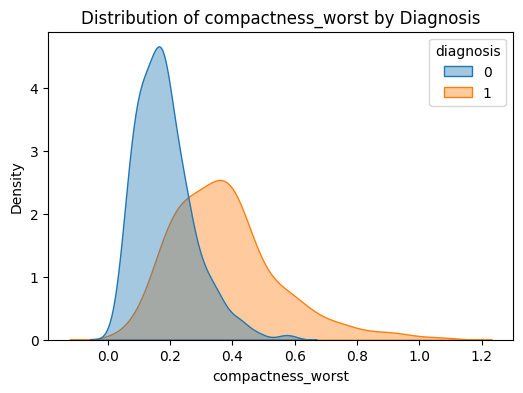

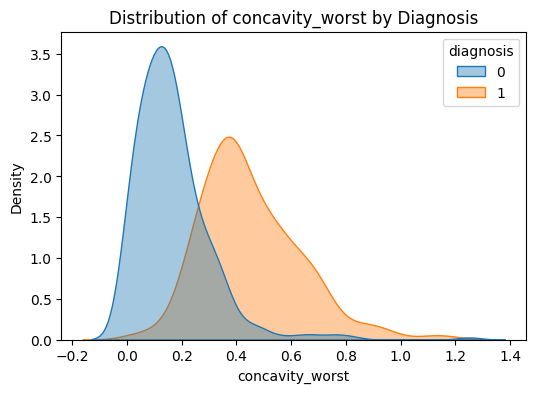

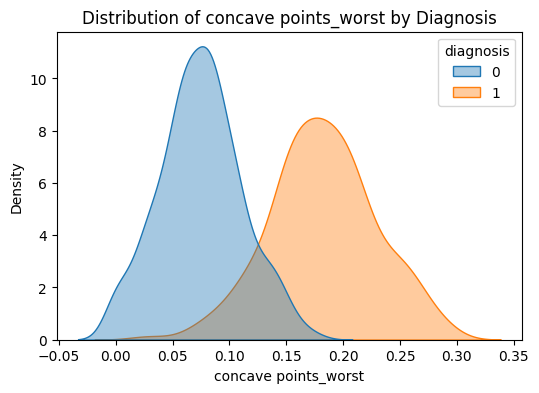

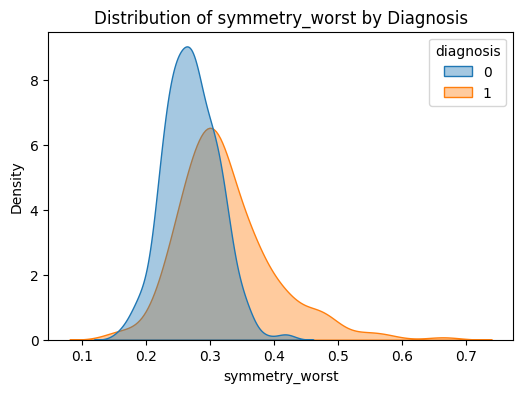

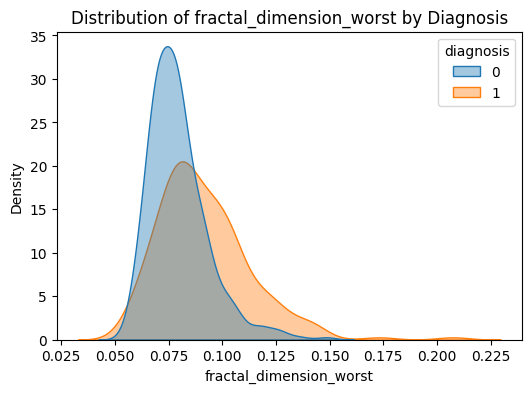

In [84]:
for col in df_features.columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='diagnosis', fill=True, common_norm=False, alpha=0.4)
    plt.title(f"Distribution of {col} by Diagnosis")
    plt.show()

In [85]:
corr_with_target = df_features.corrwith(df['diagnosis']).sort_values(ascending=False)
corr_with_target

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

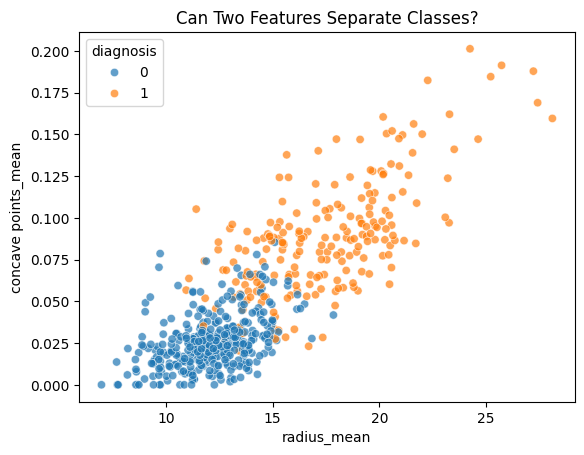

In [95]:
sns.scatterplot(
    data=df,
    x='radius_mean', 
    y='concave points_mean',
    hue='diagnosis',
    alpha=0.7
)
plt.title("Can Two Features Separate Classes?")
plt.show()

### Multicollinearity & Redundancy Analysis

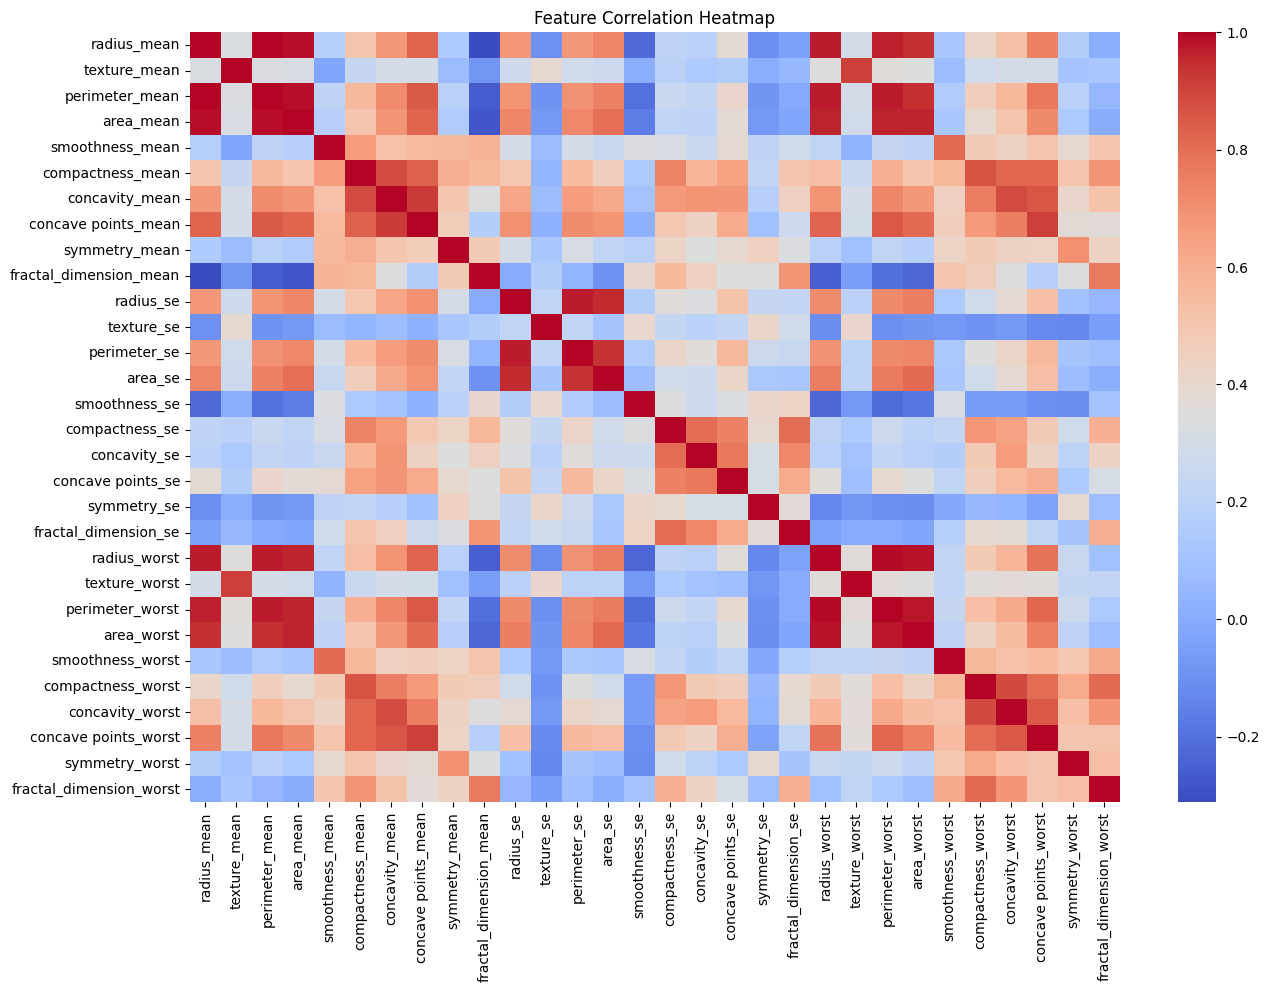

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(df_features.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [97]:
import numpy as np

corr_matrix = df_features.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
redundant_pairs = upper_tri.stack().sort_values(ascending=False)
redundant_pairs.head(10)


radius_mean      perimeter_mean     0.997855
radius_worst     perimeter_worst    0.993708
radius_mean      area_mean          0.987357
perimeter_mean   area_mean          0.986507
radius_worst     area_worst         0.984015
perimeter_worst  area_worst         0.977578
radius_se        perimeter_se       0.972794
perimeter_mean   perimeter_worst    0.970387
radius_mean      radius_worst       0.969539
perimeter_mean   radius_worst       0.969476
dtype: float64

##### Variance Inflation Factor (VIF) Calculation

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_features.columns
vif_data["VIF"] = [
    variance_inflation_factor(df_features.values, i)
    for i in range(df_features.shape[1])
]
vif_data.sort_values(by="VIF", ascending=False).head(10)

,feature,VIF
0,radius_mean,63306.172036
2,perimeter_mean,58123.586079
20,radius_worst,9674.742602
22,perimeter_worst,4487.781270
3,area_mean,1287.262339
23,area_worst,1138.759252
9,fractal_dimension_mean,629.679874
29,fractal_dimension_worst,423.396723
4,smoothness_mean,393.398166
24,smoothness_worst,375.597155


##### Learnings
Data has clear feature clusters (redundancy)
✔ Size features are highly correlated
✔ Irregularity features moderately correlate
✔ We should:

Either keep only representatives

OR use regularization

## Data Preparation & Feature Scaling
### Split the data into features and target variable

In [101]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

#### Test Train Split

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Standard Scaler for Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## Baseline Machine Learning Models
### Dummy Classifier (Baseline)

In [104]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/Users/amitupadhyay/Desktop/Projects/Personal/ML/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/amitupadhyay/Desktop/Projects/Personal/ML/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/amitupadhyay/Desktop/Projects/Personal/ML/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### ROC-AUC Curve

In [106]:
from sklearn.metrics import roc_auc_score

y_pred_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_pred_prob_lr)

0.996031746031746

#### Confusion Matrix

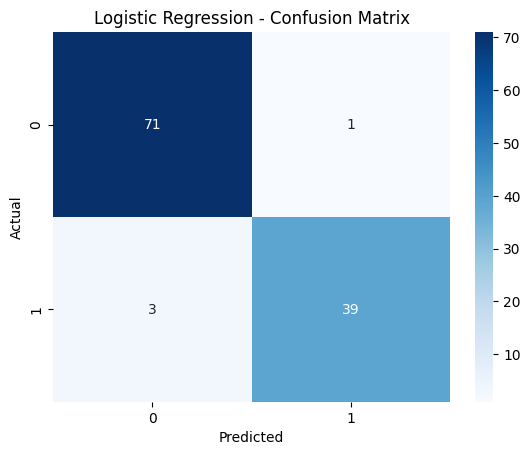

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

#### Lasso Regularization

In [108]:
logreg_l1 = LogisticRegression(
    penalty='l1', solver='liblinear', class_weight='balanced', max_iter=500
)
logreg_l1.fit(X_train_scaled, y_train)
print(classification_report(y_test, logreg_l1.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

